# Reinforcement Learning

# Online prediction

This notebook presents the online prediction of a value function by **Monte-Carlo learning** and **TD learning**.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from model import Maze, Walk, TicTacToe, Nim, ConnectFour
from agent import Agent, OnlinePrediction
from dp import PolicyEvaluation, PolicyIteration

## To do

* Complete the ``MCLearning`` class and test it on various environments.
* Complete the ``TDLearning`` class and test it on various environments.
* Compare with the exact solution obtained by Dynamic Programming when available.

## Monte-Carlo learning

In [2]:
class MCLearning(OnlinePrediction):
    """Online prediction by Monte-Carlo."""
        
    def update_values(self):
        """Update the values from an episode."""
        stop, states, rewards = self.get_episode()
        gain = 0
        # backward update
        for state, reward in zip(reversed(states), reversed(rewards)):
            self.add_state(state)
            state_code = self.model.encode(state)
            # number of visits to this state
            self.state_count[state_code] += 1
            # value of this state
            # to be modified
            # begin
            gain = self.gamma * gain + reward
            # end 
            diff = gain - self.state_value[state_code]
            count = self.state_count[state_code]
            self.state_value[state_code] += diff / count

## TD learning

In [3]:
class TDLearning(OnlinePrediction):
    """Online prediction by TD learning."""
        
    def update_values(self):
        """Update values online."""
        self.model.__init__()
        for t in range(self.n_steps):
            state = self.model.state
            self.add_state(state)
            state_code = self.model.encode(state)
            # number of visits to this state
            self.state_count[state_code] += 1
            
            # next state            
            action = self.get_action(state)
            reward, stop = self.model.step(action)
            next_state = self.model.state
            self.add_state(next_state)
            next_state_code = self.model.encode(next_state)
            
            # to be modified
            # begin
            gain = reward + self.gamma * self.state_value[next_state_code]

            diff = gain - self.state_value[state_code]
            count = self.state_count[state_code]
            self.state_value[state_code] += diff / count
            # end
            
            if stop:
                break

## Walk

### MC

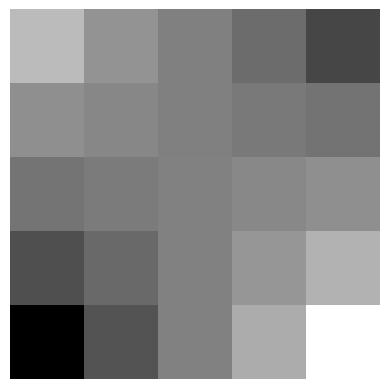

In [4]:
model = Walk()
algo = MCLearning(model, policy='random', gamma=0.9)

n_episodes = 1000
for t in range(n_episodes):
    algo.update_values()

values = algo.get_values()
model.display_values(values)

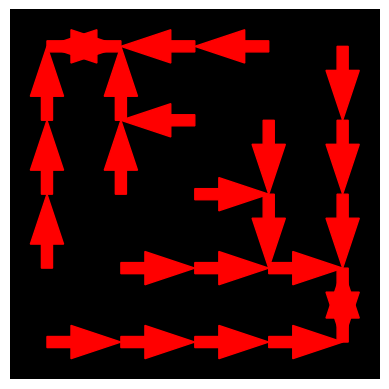

In [5]:
policy = algo.improve_policy()
model.display_policy(policy)

### TD

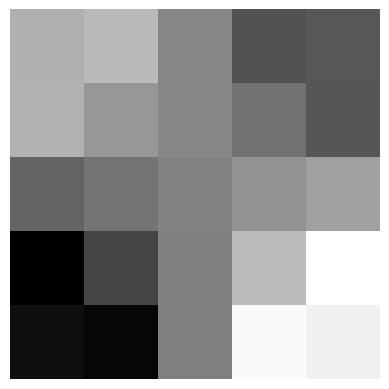

In [7]:
algo = TDLearning(model, policy='random', gamma=0.9)

n_episodes = 100
for t in range(n_episodes):
    algo.update_values()

values = algo.get_values()
model.display_values(values)

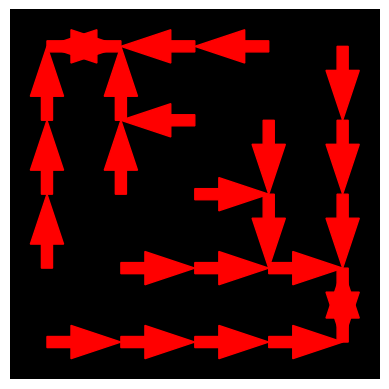

In [8]:
policy = algo.improve_policy()
model.display_policy(policy)

### Dynamic programming solution

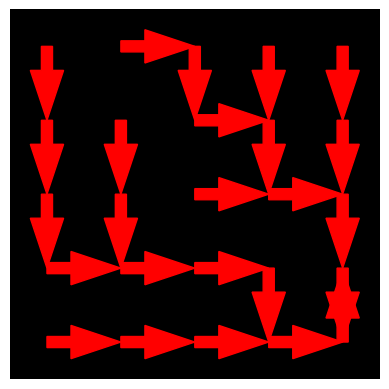

In [9]:
algo = PolicyIteration(model, n_iter_eval=1000, gamma=0.9)
policy = algo.get_optimal_policy()
model.display_policy(policy)

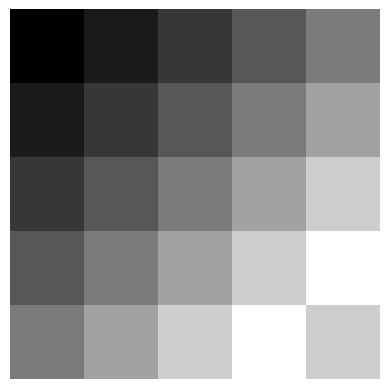

In [10]:
values = algo.values
model.display_values(values)

## Maze

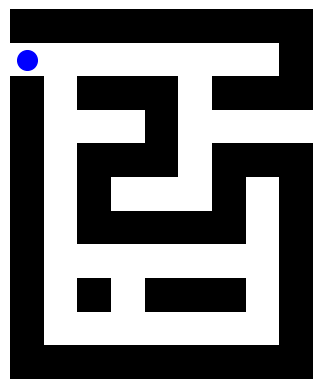

In [11]:
model = Maze()
# set parameters
maze_map = np.load('maze_small.npy')
model.set_parameters(maze_map, (1, 0), [(3, 8)])
# init
model = Maze()
model.display()

### MC

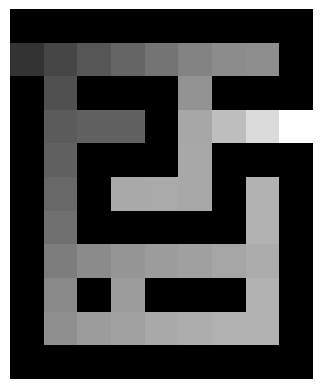

In [12]:
algo = MCLearning(model, policy='random')
n_episodes = 1000
for t in range(n_episodes):
    algo.update_values()

values = algo.get_values()
model.display_values(values)

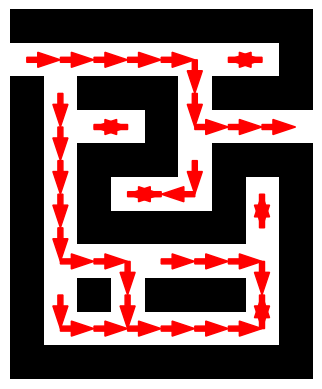

In [13]:
policy = algo.improve_policy()
model.display_policy(policy)

### TD

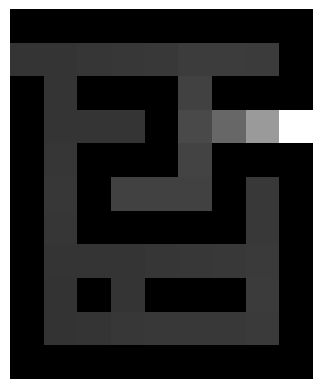

In [14]:
algo = TDLearning(model, policy='random', gamma=0.9)

n_episodes = 100
for t in range(n_episodes):
    algo.update_values()

values = algo.get_values()
model.display_values(values)

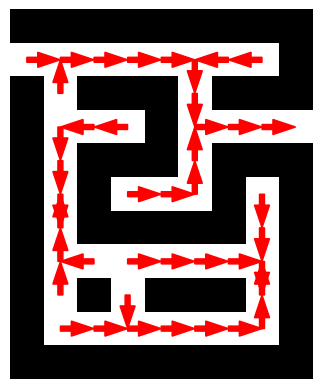

In [16]:
policy = algo.improve_policy()
model.display_policy(policy)

### Dynamic programming solution

Convergence after 10 iterations.


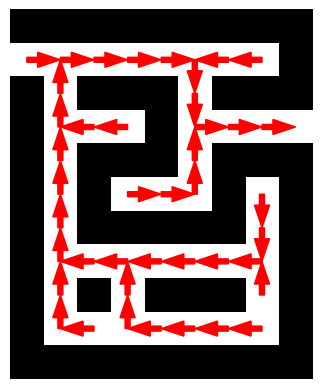

In [17]:
algo = PolicyIteration(model, n_iter_eval=1000, gamma=0.9)
policy = algo.get_optimal_policy()
model.display_policy(policy)

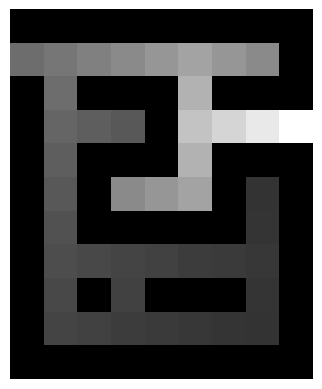

In [18]:
values = algo.values
model.display_values(values)

## Games

In [33]:
Game = TicTacToe

# random player
game = Game()
agent = Agent(game)

np.unique(agent.get_gains(), return_counts=True)

(array([-1,  0,  1]), array([28, 18, 54], dtype=int64))

In [34]:
# online prediction of the random player
algo = MCLearning(game, policy='random')
n_games = 10000
for t in range(n_games):
    algo.update_values()

# policy improvement
policy = algo.improve_policy()

# test this new policy
agent = Agent(game, policy)
np.unique(agent.get_gains(), return_counts=True)

(array([-1,  1]), array([ 1, 99], dtype=int64))

In [35]:
# a better adversary
game = TicTacToe(adversary_policy='one_step')
agent = Agent(game)

np.unique(agent.get_gains(), return_counts=True)

(array([-1,  0,  1]), array([64, 30,  6], dtype=int64))

In [36]:
# online prediction against this adversary
algo = MCLearning(game, policy='random')
n_games = 10000
for t in range(n_games):
    algo.update_values()

# policy improvement
adversary_policy = algo.improve_policy()

In [37]:
# playing together 
game = Game(adversary_policy=adversary_policy)
agent = Agent(game, policy=policy)

np.unique(agent.get_gains(), return_counts=True)

(array([0]), array([100], dtype=int64))

In [39]:
# online prediction of a better player
algo = MCLearning(game, policy='one_step')
n_games = 10000
for t in range(n_games):
    algo.update_values()

# policy improvement
one_step_policy = algo.improve_policy()

In [41]:
# playing together 
game = Game(adversary_policy=adversary_policy)
agent = Agent(game, policy=one_step_policy)

np.unique(agent.get_gains(), return_counts=True)

(array([0]), array([100], dtype=int64))